# Time Series Forecasting using ARIMA

**Links!**

https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

### Properties
**Trend:** Long-term change. Slope through the data. <br>
**Seasonality:** Hour, day, week, month, year. View with cyclical patters of fixed frequency. <br>
**Cyclicity:** Changes that are not of a fixed frequency. Often due to economic conditions, realted to business cycle. Durations can vary but be up to 2 years. <br>
**Residuals:** Time series can be decomposed into 2 parts - 1. Forecast made up on one or several forecasted values. 2. Residuals, differnce between an observation and it's predicted value at each time step.

### Decomposition of a time series
- Trend
- Seasonal Component
- Residuals

### Stationarity
**Definition:** Property of exhibiting constant statistical properties (mean, variance, autocorrelation, etc.)

**Stationarize Data:**
- De-trending: remove underlying trend in series. Indexed data may be measured by currencies which are linked to a price index or related to inflation. Dividing the series by this index de-trends data. Non-indexed data: estimate if trend is constant, linear, or exponential. Constant and linear are easy, exponential requires a growth rate estimate and apply the same method as for indexed data.
- Differencing: Seasonal or cyclical patters can be removed by subtracting periodical values. If data is seasonal, subtract the series with a 12-lag difference series.
- Logging: If the compound rate in the trend is not due to an index, logging can help linearize a series with an exponential trend.

**Test for stationarity**

- Plot rolling statistics for visual inspection

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('Solarize_Light2')

In [96]:
# df=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv').set_index('Month')
df=pd.read_csv('https://raw.githubusercontent.com/FinYang/tsdl/99863812c74a57d48fe2aaa3962d1f0fa4cb641f/data-raw/data/exports.dat',names=['Sales'])

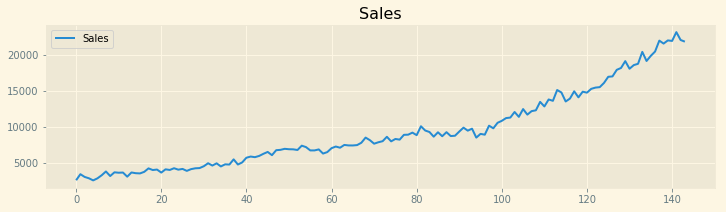

In [97]:
# Plot the Sales trend
df.plot(figsize=(12,3));
plt.title('Sales');

In [98]:
# Define sales rolling window and a seasonal differncing variable
df['z_Sales']=(df['Sales']-df.Sales.rolling(window=12).mean())/df.Sales.rolling(window=12).std()
df['zp_Sales']=df['z_Sales']-df['z_Sales'].shift(12)

In [99]:
def plot_rolling(df):
    fig, ax = plt.subplots(3,figsize=(12, 9))
    ax[0].plot(df.index, df.Sales, label='raw data')
    ax[0].plot(df.Sales.rolling(window=12).mean(), label="rolling mean");
    ax[0].plot(df.Sales.rolling(window=12).std(), label="rolling std (x10)");
    ax[0].legend()

    ax[1].plot(df.index, df.z_Sales, label="de-trended data")
    ax[1].plot(df.z_Sales.rolling(window=12).mean(), label="rolling mean");
    ax[1].plot(df.z_Sales.rolling(window=12).std(), label="rolling std (x10)");
    ax[1].legend()

    ax[2].plot(df.index, df.zp_Sales, label="12 lag differenced de-trended data")
    ax[2].plot(df.zp_Sales.rolling(window=12).mean(), label="rolling mean");
    ax[2].plot(df.zp_Sales.rolling(window=12).std(), label="rolling std (x10)");
    ax[2].legend()

    plt.tight_layout()
    fig.autofmt_xdate()

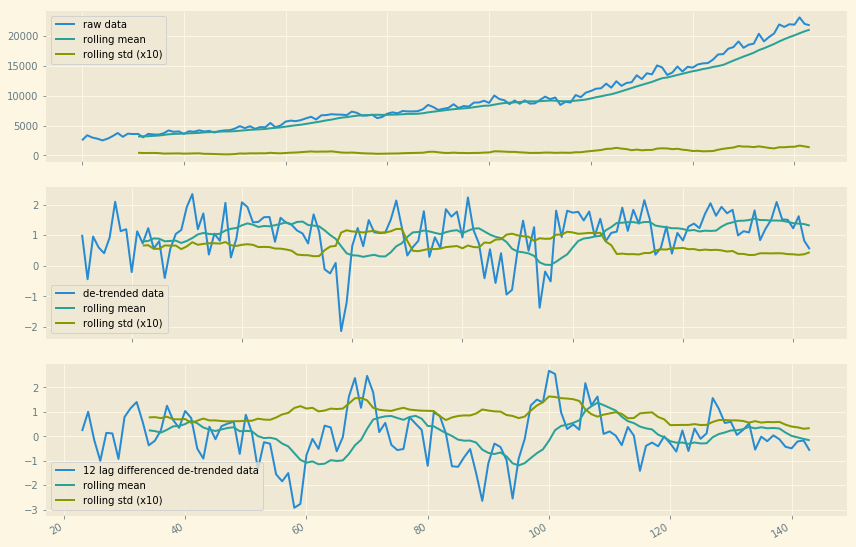

In [100]:
plot_rolling(df)